<a href="https://colab.research.google.com/github/jazaineam1/Andes_ADDBD/blob/main/Sesion13/Clase_13_Regresio%CC%81n_Logi%CC%81stica_y_metricas_VERSION2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Análisis de Datos y Big data***

## ***Universidad de los Andes***
>## **Dirección de Educación Continua.**
>>## **Formación de habilidades escenciales.**

![Imágen1](https://github.com/jazaineam1/Andes_ADDBD/blob/main/Imagenes/Presentaci%C3%B3n-removebg-preview.png?raw=true)

**Ver la presentación  [acá](https://github.com/jazaineam1/Andes_ADDBD/raw/main/Sesion13/Clase13-Métricas_de_desmpeño_y_selección_de_modelos.pdf)**
# **Regresión logística - Clasificación binaria**



Contamos con una [base de datos](https://www.kaggle.com/datasets/manishkumar7432698/airline-passangers-booking-data?resource=download) con **información de reservaciones de vuelos**. Algunas reservaciones son completadas efectivamente, y otras no.

Para mejorar la experiencia de usuario, la aerolínea desea ofrecer una **promoción especial** a las reservas que usualmente solicitan alimentación durante el vuelo.

Para esto, la idea es que antes de que un usuario indique querer alimentación durante el vuelo, la aerolínea le ofrezca unas entradas gratis. Esto debería mejorar las calificaciones de experiencia de reservación, mitigando los costos (no ofreciéndole comida gratis a todo el mundo).

Para esto **queremos entrentar una máquina que prediga** qué reservaciones van a solicitar alimentación, a partir de otras características insertadas.

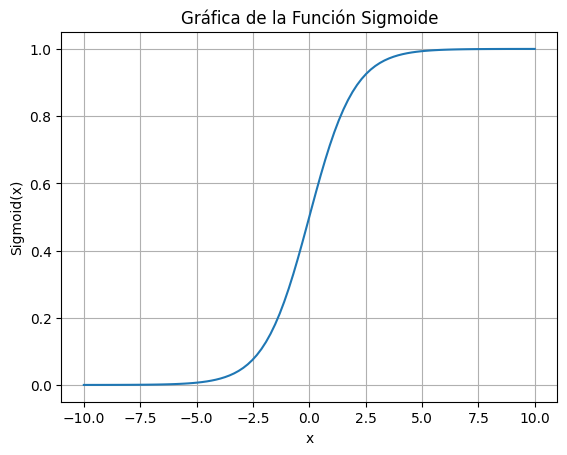

In [1]:
# prompt: graficame la función sigmoide

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  """Función sigmoide."""
  return 1 / (1 + np.exp(-x))

# Crear datos para la gráfica
x = np.linspace(-10, 10, 100)  # Rango de valores de x
y = sigmoid(x)

# Crear la gráfica
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.title('Gráfica de la Función Sigmoide')
plt.grid(True)
plt.show()

## Carga y exploración inicial

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
booking = pd.read_csv("https://raw.githubusercontent.com/jazaineam1/Andes_ADDBD/main/Sesion13/Passanger_booking_data.csv")

In [5]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50002 non-null  int64  
 1   sales_channel          50002 non-null  object 
 2   trip_type              50002 non-null  object 
 3   purchase_lead          50002 non-null  int64  
 4   length_of_stay         50002 non-null  int64  
 5   flight_hour            50002 non-null  int64  
 6   flight_day             50002 non-null  object 
 7   route                  50002 non-null  object 
 8   booking_origin         50002 non-null  object 
 9   wants_extra_baggage    50002 non-null  int64  
 10  wants_preferred_seat   50002 non-null  int64  
 11  wants_in_flight_meals  50002 non-null  int64  
 12  flight_duration        50002 non-null  float64
 13  booking_complete       50002 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [6]:
booking.isna().sum()

,0
num_passengers,0
sales_channel,0
trip_type,0
purchase_lead,0
length_of_stay,0
flight_hour,0
flight_day,0
route,0
booking_origin,0
wants_extra_baggage,0


In [8]:
booking.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0


In [7]:
booking['booking_complete'].value_counts()

,count
booking_complete,
0,42523
1,7479


In [9]:
booking['sales_channel'].value_counts()

,count
sales_channel,
Internet,44383
Mobile,5619


In [10]:
booking['trip_type'].value_counts()

,count
trip_type,
RoundTrip,49498
OneWay,387
CircleTrip,117


## Predicción
Vamos a utilizar un modelo lineal y uno logístico para predecir:

* Si una reserva prefiere comidas en el vuelo

A partir de las características de la reserva:

* Si indica silla preferida
* Si desea equipaje extra
* Longitud de la estadía

<Axes: >

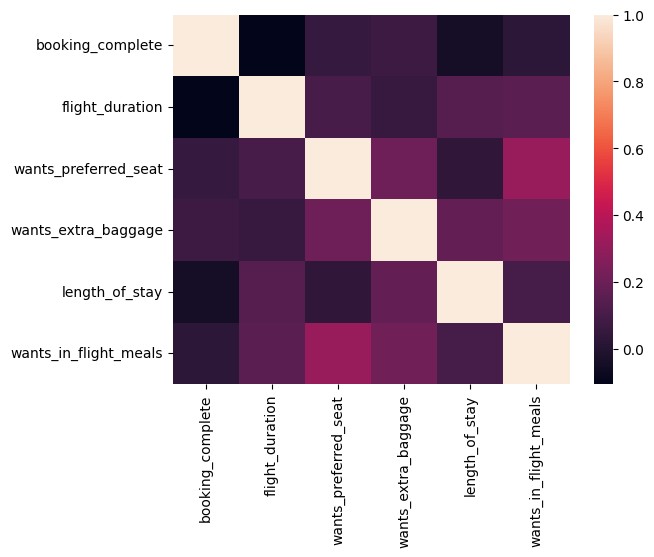

In [11]:
sns.heatmap(booking[["booking_complete","flight_duration",'wants_preferred_seat', 'wants_extra_baggage', 'length_of_stay','wants_in_flight_meals']].corr())

In [12]:
X = booking[['wants_preferred_seat', 'wants_extra_baggage', 'length_of_stay']]
y = booking['wants_in_flight_meals']

In [13]:
# Nuestras predictoras (dos variables dummy y una numérica continua)
X.head()

,wants_preferred_seat,wants_extra_baggage,length_of_stay
0,0,0,12
1,0,1,19
2,0,0,20
3,1,1,22
4,0,0,31


In [14]:
# Nuestra variable a predecir (si en la reservación solicitan alimentos en el vuelo)
y.head()

,wants_in_flight_meals
0,0
1,0
2,0
3,0
4,1


## Separación de datos

Vamos a hablar más en detalle más adelante sobre esto pero:

Siempre que queremos hacer predictiva queremos **no usar la base de datos completa** para calibrar el modelo.

* Queremos usar una parte (70%) para estimar a partir de los datos.
* Queremos usar una parte (30%) para evaluar con datos que el modelo nunca ha visto.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)

In [19]:
X_train

,wants_preferred_seat,wants_extra_baggage,length_of_stay
44695,0,0,6
5436,0,1,18
13840,0,1,29
1016,0,0,19
28783,0,0,3
...,...,...,...
33403,0,1,4
33349,0,0,4
2169,1,1,37
48366,0,1,6


In [20]:
y_train

,wants_in_flight_meals
44695,0
5436,1
13840,0
1016,0
28783,0
...,...
33403,0
33349,0
2169,1
48366,0


## Modelo lineal

In [21]:
modeloLin = LinearRegression()

# Ajustamos el modelo con los datos de entrenamiento (70%)
modeloLin.fit(X_train, y_train)

y_pobabilidades_lin = modeloLin.predict(X_test)

In [22]:
y_pobabilidades_lin

array([0.21531525, 0.39165856, 0.38790522, ..., 0.67674863, 0.52386371,
       0.70114536])

Text(0.5, 0, 'Longitud de la estadía')

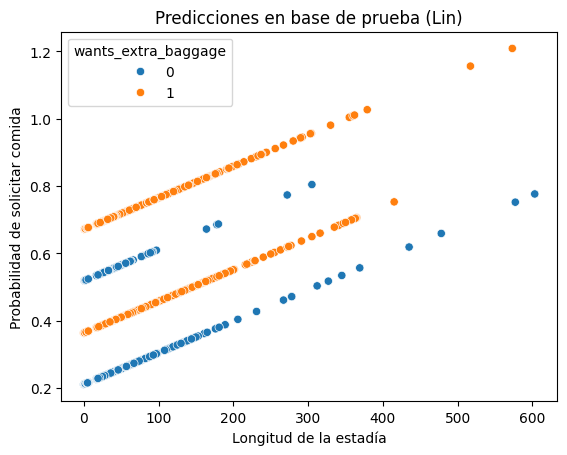

In [25]:
# Las filas que tienen datos completos
X_test_completos = X_test[~X_test.isnull().any(axis=1)]
sns.scatterplot(y=y_pobabilidades_lin, x=X_test_completos['length_of_stay'],hue=X_test_completos['wants_extra_baggage'])
plt.title('Predicciones en base de prueba (Lin)')
plt.ylabel('Probabilidad de solicitar comida')
plt.xlabel('Longitud de la estadía')

**Observamos que:**

* Hay cuatro grupos de predicciones (eso corresponde a que los valores esperados dependen de las otras variables dummy: equipaje y preferencia de silla.

**Ejercicio**: incluir en la dispersión el parámetro:
<pre>
hue=X_test_completos['wants_preferred_seat']
</pre>

Esto permite ver los grupos esperados según otras variables predictoras.

* **Pero más aún:** ¡Algunas probabilidades son mayores a 1!

## Modelo Logístico

In [26]:
modeloLog  = LogisticRegression(random_state=16)

# Ajustamos el modelo con los datos de entrenamiento (70%)
modeloLog.fit(X_train, y_train)

probabilidades = modeloLog.predict_proba(X_test)[:,1]

Text(0.5, 0, 'Longitud de la estadía')

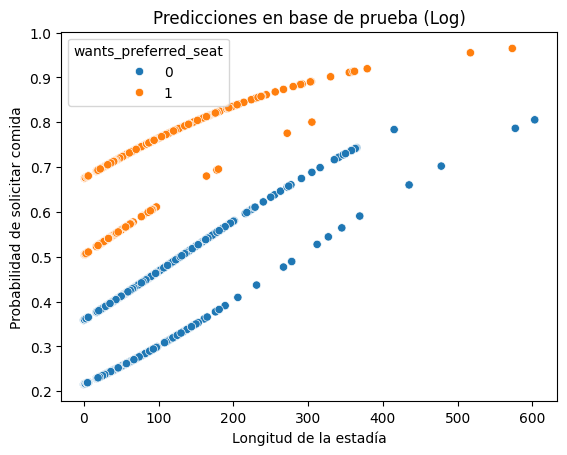

In [27]:
# Las filas que tienen datos completos
X_test_completos = X_test[~X_test.isnull().any(axis=1)]
sns.scatterplot(y=probabilidades, x=X_test_completos['length_of_stay'],hue=X_test_completos['wants_preferred_seat'])
plt.title('Predicciones en base de prueba (Log)')
plt.ylabel('Probabilidad de solicitar comida')
plt.xlabel('Longitud de la estadía')

**Vemos que:**

* Las predicciones de la probabilidad ahora son curvas, no lineales.
* No hay probabilidades por encima de 1 o por debajo de cero.

## Clasificación a partir de las probabilidades

**Para clasificar** predecimos las filas con probabilid superior a 0.5, como cierta categoría, y las demás como la contraria.

### Lineal

In [28]:
pred_lineales = y_pobabilidades_lin>0.5
pred_lineales = pd.DataFrame({'Predicción':pred_lineales})
di = {True: 1, False: 0}
pred_lineales.replace({"Predicción": di}, inplace=True)

<ipython-input-28-199460c79d55>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pred_lineales.replace({"Predicción": di}, inplace=True)


In [29]:
pred_lineales.value_counts()

,count
Predicción,
0,10404
1,4597


### Logístico

In [30]:
y_pred_log = modeloLog.predict(X_test)
y_pred_log

array([0, 0, 0, ..., 1, 1, 1])

In [31]:
y_pred_log_prob = modeloLog.predict_proba(X_test)
y_pred_log_prob

array([[0.78117694, 0.21882306],
       [0.60981069, 0.39018931],
       [0.61408835, 0.38591165],
       ...,
       [0.31970915, 0.68029085],
       [0.48958316, 0.51041684],
       [0.29479705, 0.70520295]])

In [32]:
umbral =0.4
y_pred_log_umbral = (y_pred_log_prob[:,1]>umbral).astype(int)
y_pred_log_umbral

array([0, 0, 0, ..., 1, 1, 1])

In [33]:
pd.DataFrame(y_pred_log_umbral).value_counts()

,count
0,
0,9358
1,5643


## Matrices de confusión

In [34]:
matriz_log = pd.crosstab(y_test, y_pred_log_umbral)
matriz_log

col_0,0,1
wants_in_flight_meals,,
0,6389,2144
1,2969,3499


[Text(0.5, 1.0, 'Matriz de confusión modelo Logit')]

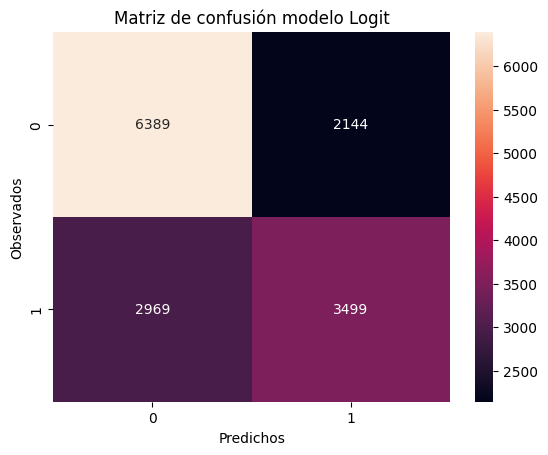

In [35]:
ax = sns.heatmap(matriz_log, annot=True, fmt='.0f')
ax.set(ylabel="Observados", xlabel="Predichos")
ax.set(title="Matriz de confusión modelo Logit")

In [36]:
y_test=y_test.reset_index(drop=True)

In [37]:
matriz_lin = pd.crosstab(y_test, pred_lineales['Predicción'])
matriz_lin

Predicción,0,1
wants_in_flight_meals,,
0,6982,1551
1,3422,3046


[Text(0.5, 1.0, 'Matriz de confusión modelo Lineal')]

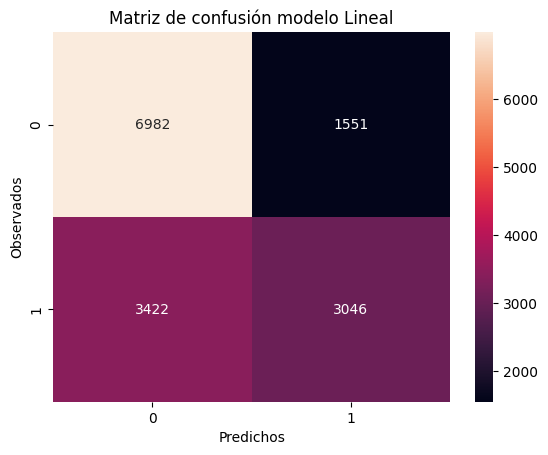

In [38]:
ax = sns.heatmap(matriz_lin, annot=True, fmt='.0f')
ax.set(ylabel="Observados", xlabel="Predichos")
ax.set(title="Matriz de confusión modelo Lineal")

## Métricas
Calculemos el Accuracy, Precision y Recall.
* Accuracy: ¿del total de predicciones cuántas hizo bien?
* Precision: ¿de los que dijo que eran positivos, en cuántos atinó?
* Recall: ¿de todos los que eran positivos, cuántos logró atrapar?

In [46]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

In [47]:
accuracy=accuracy_score(y_test, y_pred_log_umbral)
accuracy

0.6591560562629158

In [48]:
precision=precision_score(y_test, y_pred_log_umbral)
precision

0.620060251639199

In [49]:
recall=recall_score(y_test, y_pred_log_umbral)
recall

0.5409709338280767

In [50]:
f1_score=f1_score(y_test, y_pred_log_umbral)
f1_score

0.5778218148790356

In [51]:
confusion_matrix(y_test, y_pred_log_umbral)

array([[6389, 2144],
       [2969, 3499]])

In [52]:
print(classification_report(y_test, y_pred_log_umbral))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71      8533
           1       0.62      0.54      0.58      6468

    accuracy                           0.66     15001
   macro avg       0.65      0.64      0.65     15001
weighted avg       0.66      0.66      0.66     15001



In [53]:
umbrales = np.linspace(0,1,100)
mejor_f1 = 0
mejor_umbral = 0
for umbral in umbrales:
  y_pred_log_umbral = (y_pred_log_prob[:,1]>umbral).astype(int)
  f1 = f1_score(y_test, y_pred_log_umbral)
  if f1 > mejor_f1:
    mejor_f1 = f1
    mejor_umbral = umbral
print(f"este es el mejor f1-score{mejor_f1}")
print(f"este es el mejor umbral{mejor_umbral}")

TypeError: 'numpy.float64' object is not callable

In [56]:
from sklearn.metrics import f1_score, recall_score, confusion_matrix, classification_report
import numpy as np

umbrales = np.linspace(0,1,101)
mejor_f1 = 0
mejor_umbral = 0
for umbral in umbrales:
  y_pred_log_umbral = (y_pred_log_prob[:,1]>umbral).astype(int)
  # Use a different variable name for the f1 score, like 'f1'
  f1 = f1_score(y_test, y_pred_log_umbral)
  if f1 > mejor_f1:
    mejor_f1 = f1
    mejor_umbral = umbral
print(f"este es el mejor f1-score {mejor_f1}")
print(f"este es el mejor umbral {mejor_umbral}")

este es el mejor f1-score 0.629335176863694
este es el mejor umbral 0.36


In [59]:
umbrales = np.linspace(0,1,101)
mejor_accuracy = 0
mejor_umbral = 0
for umbral in umbrales:

  y_pred_log_umbral = (y_pred_log_prob[:,1]>umbral).astype(int)
  accuracy = accuracy_score(y_test, y_pred_log_umbral)
  print(f"umbral es {umbral} y accuracy es {accuracy}" )
  if accuracy > mejor_accuracy:
    mejor_accuracy = accuracy
    mejor_umbral = umbral
print(f"este es el mejor accuracy {accuracy}")
print(f"este es el mejor umbral {mejor_umbral}")

umbral es 0.0 y accuracy es 0.43117125524965
umbral es 0.01 y accuracy es 0.43117125524965
umbral es 0.02 y accuracy es 0.43117125524965
umbral es 0.03 y accuracy es 0.43117125524965
umbral es 0.04 y accuracy es 0.43117125524965
umbral es 0.05 y accuracy es 0.43117125524965
umbral es 0.06 y accuracy es 0.43117125524965
umbral es 0.07 y accuracy es 0.43117125524965
umbral es 0.08 y accuracy es 0.43117125524965
umbral es 0.09 y accuracy es 0.43117125524965
umbral es 0.1 y accuracy es 0.43117125524965
umbral es 0.11 y accuracy es 0.43117125524965
umbral es 0.12 y accuracy es 0.43117125524965
umbral es 0.13 y accuracy es 0.43117125524965
umbral es 0.14 y accuracy es 0.43117125524965
umbral es 0.15 y accuracy es 0.43117125524965
umbral es 0.16 y accuracy es 0.43117125524965
umbral es 0.17 y accuracy es 0.43117125524965
umbral es 0.18 y accuracy es 0.43117125524965
umbral es 0.19 y accuracy es 0.43117125524965
umbral es 0.2 y accuracy es 0.43117125524965
umbral es 0.21 y accuracy es 0.431171

## Ejercicio

**Objetivo:**
Vamos a utilizar regresión logística  para tratar de predecir si un pasajero sobrevivió o no.

**Pasos:**
1. Cargar el conjunto de datos: Usaremos el conjunto de datos del Titanic.

2. Preprocesar los datos: Hay que manejar valores faltantes y codificar las variables categóricas.

3. Entrenar el modelo de regresión lineal.

4. Evaluar el rendimiento del modelo usando métricas de clasificación.

5. Mostrar las predicciones.

In [ ]:
titanic = sns.load_dataset('titanic')
data = titanic[['survived',  'sex', 'age', 'fare']]
data

,survived,sex,age,fare
0,0,male,22.0,7.2500
1,1,female,38.0,71.2833
2,1,female,26.0,7.9250
3,1,female,35.0,53.1000
4,0,male,35.0,8.0500
...,...,...,...,...
886,0,male,27.0,13.0000
887,1,female,19.0,30.0000
888,0,female,NaN,23.4500
889,1,male,26.0,30.0000


In [ ]:
### Manejo de valores faltantes
# Rellenamos los valores faltantes en 'age' con la media


# Convertir la variable categórica 'sex' a numérica




In [ ]:
X = data[[ 'sex', 'age', 'fare']]
y = data['survived']

##completar el código  inicializa la regresión logística




In [ ]:
##Revisa que tan bien lo hizo mirando las clasificaciones correctas usando matrix de confusión, accuracy, precision y recall

